In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set(style="darkgrid")

Set parameters to fit the type of neuron of choice:

In [2]:
##Parameters of the spiking neuron
rest = -60.
thres = -40.
capacitance = 100
leak = 0.7
a = 0.03
b = -2
peak = 35
reset = -50.
d = 100.

params = [rest, thres, capacitance, leak, a, b, peak, reset, d]

In [3]:
##Updates the states of the neuron
def updateIzh(params,inp, V, u, step):
    V1 = V +step* ((params[3]*(V-(params[0]))*(V-(params[1])) - u + inp)/params[2])
    u +=  step*params[4] *(params[5]*(V-(params[0]))-u)

    if V1 > params[6]:
        V1 = params[7]
        u += params[8]
    return V1,u

In [4]:
membraneHist = []

##Initial state
V =-60. 
u = 0. 

time = range(1000)

<IPython.core.display.Javascript object>


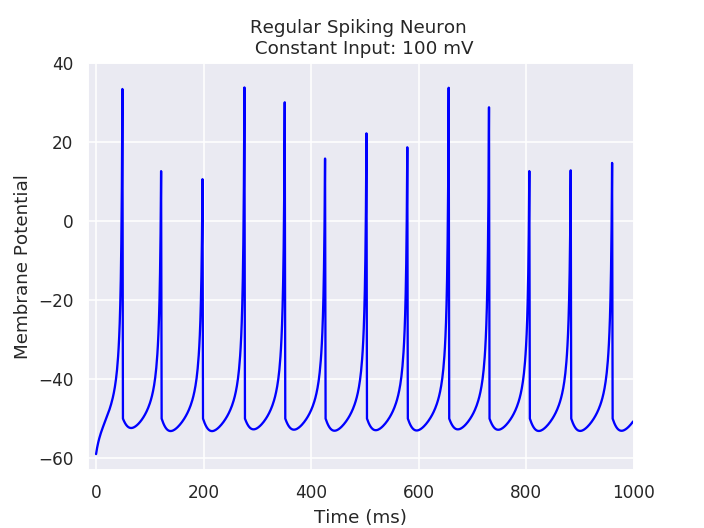

Text(0, 0.5, 'Membrane Potential')

In [5]:
for t in time:
    
    inp = 100
   
    V, u  = updateIzh(params,inp,V, u, 1.)
    membraneHist.append(V)
    
plt.plot(time, membraneHist, c='blue')
plt.axis([-15,1000, -63, 40])
plt.title('Regular Spiking Neuron \n Constant Input: 100 mV')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')